In [102]:
import nibabel as nb
import numpy as np
from glob import glob
import seaborn as sns
import random
import pylab as plt
from nilearn.image import mean_img, concat_imgs, math_img, resample_to_img, threshold_img
from nilearn.plotting import plot_glass_brain, plot_roi, plot_stat_map
from nilearn.input_data import NiftiMasker
from scipy.stats import ttest_1samp
from nistats.utils import z_score
%matplotlib inline

825


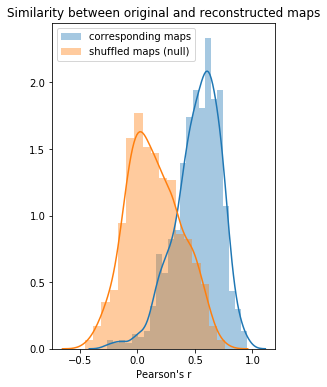

In [116]:
real_maps = glob("C:/data/peaks2maps/validation/labels/*.nii.gz")
real_maps.sort()
print(len(real_maps))
r_values = []
random_r_values = []
for real_map in real_maps:
    predicted_map = real_map.replace("labels\\l_", "predictions/p_")
    data_real = nb.load(real_map).get_data().flatten()
    data_predicted = nb.load(predicted_map).get_data().flatten()
    corr_m = np.corrcoef(data_real, data_predicted)
    r_values.append(corr_m[0,1])
    
    predicted_map = random.choice(real_maps).replace("labels\\l_", "predictions/p_")
    data_predicted = nb.load(predicted_map).get_data().flatten()
    corr_m = np.corrcoef(data_real, data_predicted)
    random_r_values.append(corr_m[0,1])

plt.figure(figsize=(4,6))
plt.title("Similarity between original and reconstructed maps")
plt.xlabel("Pearson's r")
sns.distplot(r_values, label="corresponding maps")
sns.distplot(random_r_values, label="shuffled maps (null)")
plt.legend()

C:\Users\krzys\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\krzys\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\krzys\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


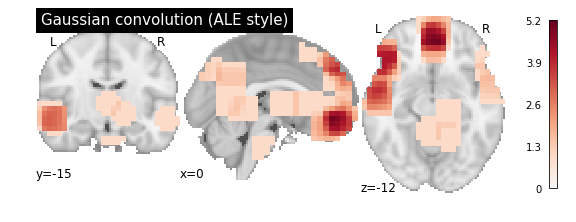

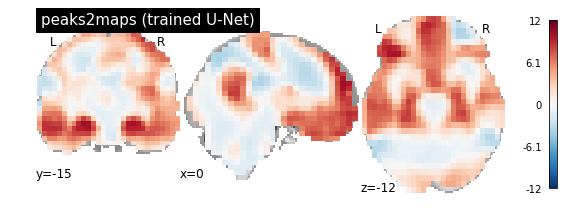

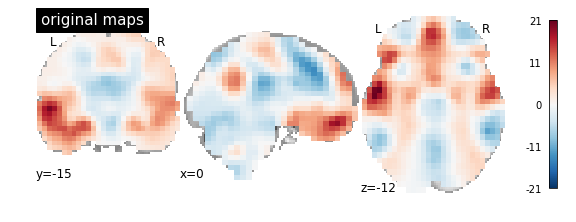

In [109]:
for task in ["LANGUAGE"]:#, "SOCIAL", "EMOTION", "GAMBLING", "RELATIONAL", "FACE-SHAPE"]:
    for folder, label in [('predictions_ref', 'Gaussian convolution (ALE style)'),
                          ('predictions', 'peaks2maps (trained U-Net)'),
                          ('labels', 'original maps')]:
        maps = glob("C:/data/peaks2maps/validation3/"+folder+"/*" + task + "*.nii.gz")[:40]
#         plot_glass_brain(mean_img(maps), title=label, plot_abs=False, colorbar=True, threshold=0,
#                          display_mode='lyrz')
        fmri_masked = nifti_masker.fit_transform(maps)
        fmri_masked[np.logical_and(fmri_masked < 0.01, fmri_masked > -0.01)] = 0
        t_values, p_values = ttest_1samp(fmri_masked, 0)
        t_map = nifti_masker.inverse_transform(t_values)
        plot_stat_map(t_map, title=label, colorbar=True, cut_coords=(0, -15, -12), cmap="RdBu_r", draw_cross=False)

In [104]:
plot_stat_map?

In [99]:
threshold_img?

C:\Users\krzys\Anaconda3\lib\site-packages\nilearn\image\image.py:192: UserWarning: The parameter 'fwhm' for smoothing is specified as 0. Converting to None (no smoothing option)
  .format(fwhm))


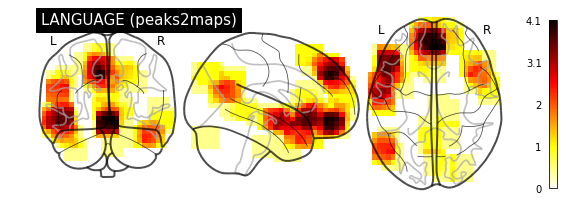

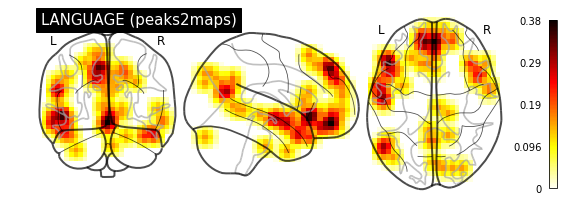

In [29]:
nifti_masker = NiftiMasker(smoothing_fwhm=0)  # cache options
maps = glob("C:/data/peaks2maps/validation2/predictions_ref/*" + 'LANGUAGE' + "*.nii.gz")[:40]
fmri_masked = nifti_masker.fit_transform(maps)
from scipy.stats import ttest_1samp
_, p_values = ttest_1samp(fmri_masked, 0)
from nistats.utils import z_score
z_map = nifti_masker.inverse_transform(z_score(p_values))
plot_glass_brain(z_map, title=task + " (peaks2maps)", plot_abs=False,
                     colorbar=True)
plot_glass_brain(math_img("np.std(a, axis=3)", a=concat_imgs(maps)), title=task + " (peaks2maps)", plot_abs=False,
                     colorbar=True)

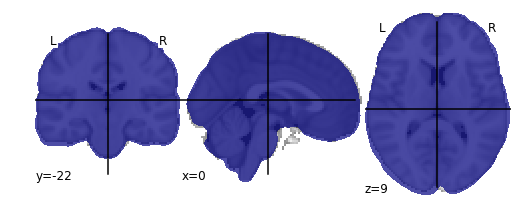

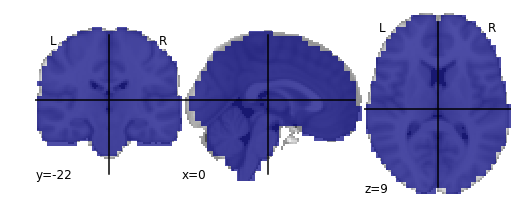

In [68]:
nii = nb.load("C:/data/mni_icbm152_nlin_asym_09c/mni_icbm152_t1_tal_nlin_asym_09c_mask.nii")
data = nii.get_data() 
data[data < 0.5] = 0
data[data > 0.5] = 1
mask_nii = nb.Nifti1Image(data, nii.affine)
plot_roi(mask_nii)
mask_nii = resample_to_img(mask_nii, "C:/data/peaks2maps/validation2/labels/l_100307_EMOTION.nii.gz", interpolation='nearest')
plot_roi(mask_nii)

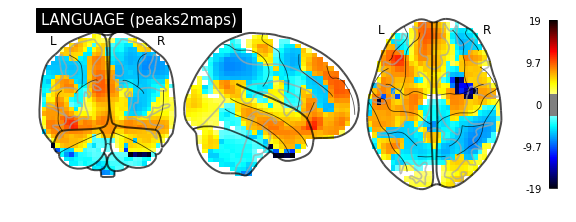

In [72]:
nifti_masker = NiftiMasker(smoothing_fwhm=None, 
                           mask_img=mask_nii)  # cache options
maps = glob("C:/data/peaks2maps/validation2/predictions//*" + 'LANGUAGE' + "*.nii.gz")[:40]
fmri_masked = nifti_masker.fit_transform(maps)
t_values, p_values = ttest_1samp(fmri_masked, 0)
z_map = nifti_masker.inverse_transform(t_values)
plot_glass_brain(z_map, title=task + " (peaks2maps)", plot_abs=False,
                     colorbar=True)

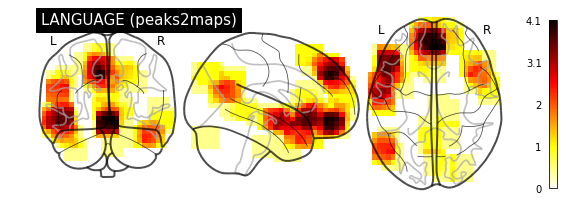

In [24]:
 plot_glass_brain(z_map, title=task + " (peaks2maps)", plot_abs=False,
                     colorbar=True)

In [59]:
math_img("a*b", a=maps[0], b=mask_nii )

ValueError: ("Input images cannot be compared, you provided 'dict_values(['C:/data/peaks2maps/validation2/labels\\\\l_100307_LANGUAGE.nii.gz', <nibabel.nifti1.Nifti1Image object at 0x0000024B5B1C8DD8>])',", 'Following field of view errors were detected:\n- img_#0 and img_#1 do not have the same shape\n- img_#0 and img_#1 do not have the same affine')

In [61]:
math_img?

In [57]:
NiftiMasker?